####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm
####Step 5: Finding accuracy, specificity 
####Step 6: Using K-Fold cross validation
####Step 7: Using GridSearchCV for finding the best K value

In [ ]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Calling the KNeighborsClassifier (in-build function) using skelarn libray
from sklearn.neighbors import KNeighborsClassifier
#Getting classification report, confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
#GridSearch(For hyperparameter tuning)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Reading CSV File

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
iris = pd.read_csv("Iris data.csv") 
#Printing the top 5 rows from dataframe
iris.head()

Saving Iris data.csv to Iris data.csv


,Sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Getting the information of each feature
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Checking the null values
iris.isnull().sum()

Sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
species         1
dtype: int64

In [ ]:
#Filling the null values by mean
iris.fillna(iris.mean(), inplace=True)

In [ ]:
#Filling the null values by forward fill
iris['species'].fillna(method='ffill', inplace=True)

In [ ]:
#Checking the null values
iris.isnull().sum()

Sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#Create 3 DataFrame for each Species
setosa = iris[iris['species']=='setosa']
versicolor = iris[iris['species']=='versicolor']
virginica = iris[iris['species']=='virginica']
#For each Species seeing the statistical information 
print(setosa.describe())
print('\n', versicolor.describe())
print('\n',virginica.describe())

       Sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000

        Sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      

In [ ]:
#Getting the statistical information for overall dataset
print(iris.describe())

       Sepal_length  sepal_width  petal_length  petal_width
count    151.000000   151.000000    151.000000   151.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.825301     0.432147      1.758529     0.760613
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Data Visualization

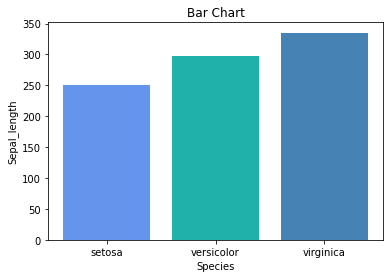

In [ ]:
#Grouping species and sepal length
df = iris.groupby('species')['Sepal_length'].sum().to_frame().reset_index()
#Creating the bar chart 
plt.bar(df['species'],df['Sepal_length'],color = ['cornflowerblue','lightseagreen','steelblue']) 
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('Sepal_length') 
#Show the plot
plt.show()

we can clearly see the difference in the sum of sepal_length for each species of a leaf. Virginica count is more than other species

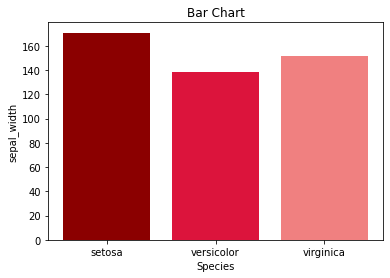

In [ ]:
#Grouping species and sepal widrh
df1 = iris.groupby('species')['sepal_width'].sum().to_frame().reset_index()
#Creating the bar chart 
plt.bar(df1['species'],df1['sepal_width'],color = ['darkred','crimson','lightcoral']) 
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('sepal_width') 
#Show the plot
plt.show()

we can clearly see the difference in the sum of sepal_width for each species of a leaf. Setosa sepal width count than the other species

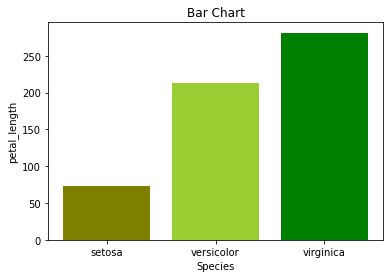

In [ ]:
#Grouping the species and petal length
df2 = iris.groupby('species')['petal_length'].sum().to_frame().reset_index()
#Creating the bar chart 
plt.bar(df2['species'],df2['petal_length'],color = ['olive','yellowgreen','green']) 
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('petal_length') 
#Show the plot
plt.show()

we can clearly see the difference in the sum of petal  for each species of a leaf. Virginica petal length count is more than the other species

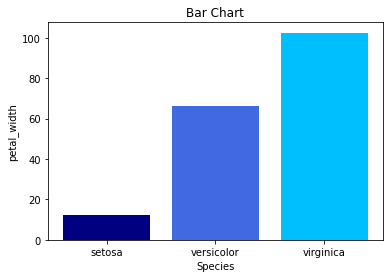

In [ ]:
#Grouping the species and petal width
df3 = iris.groupby('species')['petal_width'].sum().to_frame().reset_index()
#Creating the bar chart 
plt.bar(df3['species'],df3['petal_width'],color = ['navy','royalblue','deepskyblue']) 
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('petal_width') 
#Show the plot
plt.show()

we can clearly see the difference in the sum of sepal_width for each species of a leaf. Here viginica petal width count is more than other species. 

**So basically except sepal width, virginica count is more than other species**

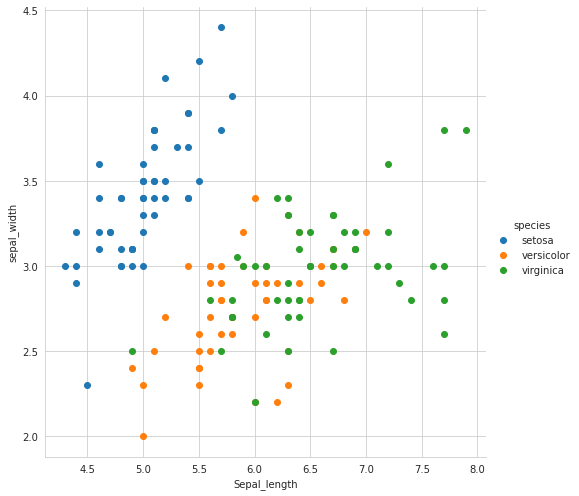

In [ ]:
#The diffrence between the sepal length vs sepal width
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=7).map(plt.scatter, "Sepal_length", "sepal_width").add_legend()
plt.show()

we can see that Setosa is very well separated than that of Versicolor and Virginica

[]

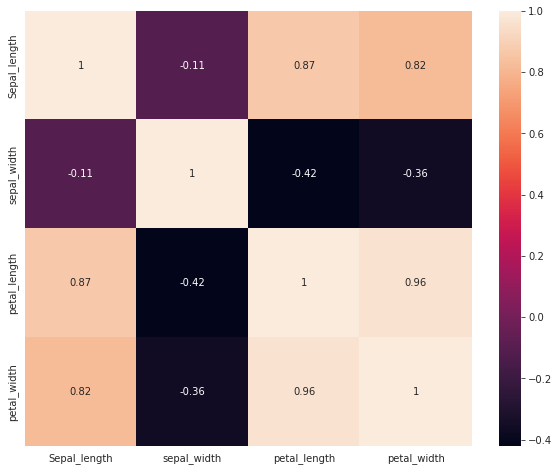

In [ ]:
#Seeing the correlation for each feature using the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

We can see correlation of each feature which are correlated to each othher. Like sepal length is more correlated to petal width

Applying the Algorithm

In [ ]:
#Creating the variable x and y
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_trai,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(31, 4)
(31,)


In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Creating the variable for Knn object
classifier = KNeighborsClassifier(n_neighbors = 3) #k = 3
#Fit X_train and Y_train to the classifier
classifier.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier.predict(X_test)

In [ ]:
#Making the prediction on X_train
y_pred1 = classifier.predict(X_train)

In [ ]:
#comparing actual response values (y_train with predicted response values (y_pred1)
print("KNN model accuracy(in %) for Training:", metrics.accuracy_score(y_train, y_pred1)*100)
#comparing actual response values (y_test) with predicted response values (y_pred)
print("KNN model accuracy(in %) for Testing:", metrics.accuracy_score(y_test, y_pred)*100)

KNN model accuracy(in %) for Training: 95.83333333333334
KNN model accuracy(in %) for Testing: 96.7741935483871


In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  6]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        31
   macro avg       0.98      0.95      0.96        31
weighted avg       0.97      0.97      0.97        31

Accuracy: 0.967741935483871


Chaning the K values

In [ ]:
#Creating the variable for Knn object
classifier1 =   #k = 5
#Fit X_train and Y_train to the classifier
classifier1.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier1.predict(X_test)
#Making the prediction on X_train
y_pred1 = classifier1.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
print("KNN model accuracy(in %) for Training:", metrics.accuracy_score(y_train, y_pred1)*100)
#comparing actual response values (y_test) with predicted response values (y_pred)
print("KNN model accuracy(in %) for Testing:", metrics.accuracy_score(y_test, y_pred)*100)

KNN model accuracy(in %) for Training: 95.83333333333334
KNN model accuracy(in %) for Testing: 100.0


In [ ]:
#Creating the variable for Knn object
classifier2 = KNeighborsClassifier(n_neighbors = 7)
#Fit X_train and Y_train to the classifier
classifier2.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = classifier2.predict(X_test)
#Making the prediction on X_train
y_pred1 = classifier2.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
print("KNN model accuracy(in %) for Training:", metrics.accuracy_score(y_train, y_pred1)*100)
#comparing actual response values (y_test) with predicted response values (y_pred)
print("KNN model accuracy(in %) for Testing:", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %) for Training: 95.83333333333334
Gaussian Naive Bayes model accuracy(in %) for Testing: 100.0


In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = (TP/(TP+FN))/total
# Specificity or true negative rate
TNR = (TN/(TN+FP))/total 
# Precision or positive predictive value
PPV = (TP/(TP+FP))/total
# Negative predictive value
NPV = (TN/(TN+FN))/total
# Fall out or false positive rate
FPR = (FP/(FP+TN))/total
# False negative rate
FNR = (FN/(TP+FN))/total
# False discovery rate
FDR = (FP/(TP+FP))/total
# Overall accuracy for each class
ACC = ((TP+TN)/(TP+FP+FN+TN))/total

In [ ]:
print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)
print('Precision:', PPV)
print('Negative Precision:' ,NPV)
print('False Positive Rate:' ,FPR)
print('False Negative Rate:' ,FNR)
print('False Discover Rate:', FDR)
print('Overall Accuracy',ACC)

Sensitivity: [0.03225806 0.03225806 0.02764977]
Specificity:  [0.03225806 0.03046595 0.03225806]
Precision: [0.03225806 0.02995392 0.03225806]
Negative Precision: [0.03225806 0.03225806 0.03096774]
False Positive Rate: [0.         0.00179211 0.        ]
False Negative Rate: [0.         0.         0.00460829]
False Discover Rate: [0.         0.00230415 0.        ]
Overall Accuracy [0.03225806 0.03121748 0.03121748]


Using the Cross Validation -K Fold

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds=10
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits=num_folds)
#Printing the results
results=cross_val_score(classifier,X_train,y_train,cv=kfold)
print("CV-Accuracy:" ,results.mean()*100)

CV-Accuracy: 92.49999999999999


Using the GridSearchCV for choosing best k values

In [ ]:
#Creating the variable for the classifier
pipeline=Pipeline([('knc', KNeighborsClassifier())])
parameters={'knc__n_neighbors':(1,3,5,7,9,11,13,15),'knc__weights':('uniform','distance')}

#Creating variable for grid searchcv
grid_search=GridSearchCV(estimator = pipeline,param_grid=parameters,n_jobs = 1,cv = 5,verbose = 1,scoring='accuracy')
grid_search.fit(X_train,y_train)

#Print the best training score
print("Best Training Score: %0.3f" % grid_search.best_score_)

#Print the best parameter
print("Best parameter set:")
best_parameters = grid_search.best_estimator_.get_params()
for param in sorted(parameters.keys()):
    print("\t %s: %r" %(param,best_parameters[param]))

#Print the Test Accuracy
y_test_pred = grid_search.predict(X_test)
print("Test------ Accuracy:",accuracy_score(y_test,y_test_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Training Score: 0.942
Best parameter set:
	 knc__n_neighbors: 5
	 knc__weights: 'distance'
Test------ Accuracy: 1.0
